In [1]:
import sys
sys.path.append("/home/huaqingj/MyResearch/TVDN")

In [2]:
from pyTVDN import TVDNDetect
from pathlib import Path
from scipy.io import loadmat
import numpy as np
%matplotlib inline

In [3]:
resDir = Path("../results")
dataDir = Path("../data")

In [4]:
filname = Path("fMRI_samples.mat")
fMRIs = loadmat(dataDir/filname)["clean_subjects"]

In [5]:
fMRI = fMRIs[0, 9]["fMRI"][:90, :]

## Construct the TVDN Detection Class


- `saveDir` is the path to save the results, if upspecified, the results will not be saved.

- You can also specify the detection parameters manunally

In [6]:
fMRIdet = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", 
                     r=6, kappa=1.65, fct=0.5, lamb=1e-4, plotfct=180, downRate=4, MaxM=10, Lmin=4, freq=0.5)

The parameters for detection are:
{'Lmin': 4,
 'MaxM': 10,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRIsample',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': False,
 'kappa': 1.65,
 'lamb': 0.0001,
 'plotfct': 180,
 'r': 6}


## Run the Main Function

In [7]:
fMRIdet()
print(f"The estimated change point set is {fMRIdet.ecpts}")


The estimated change point set is [33 57 97]


## Tuning the kappa parameters

In [8]:
kappas = np.linspace(1.45, 2, 100)
kappas = [1.45, 1.55, 1.65, 1.75, 1.85, 1.95]
fMRIdet.TuningKappa(kappas)

Current number of change point is 0.
Current number of change point is 1.
Current number of change point is 2.
Current number of change point is 3.
Current number of change point is 4.
Current number of change point is 5.
Current number of change point is 6.
Current number of change point is 7.
Current number of change point is 8.
Current number of change point is 9.
Current number of change point is 10.


### Then we  can check the best kappa parameters w.r.t mean square errors

In [9]:
print("The optimal kappas are:", fMRIdet.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdet.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdet.optNumChg)

The optimal kappas are: 1.65
The optimal number of change point under the range of kappa we speicified is: 3
The optimal number of change point is: 5


###  Update the estimated change point set based on optimal kappa

You can also specify the number of change points you want via provide the argument `numChg`, then the `UpdateEcpts` will update the current estimated change point set accordingly.

In such case, the `PlotXXX` function will plot the curves under the number of change point you provided

In [10]:
fMRIdet.UpdateEcpts(numChg=3)
fMRIdet.UpdateEcpts()
fMRIdet.ecpts

array([33., 57., 97.])

### Plot the detection results under the optimal kappa

 You may also specify the `saveFigPath` to save the figure


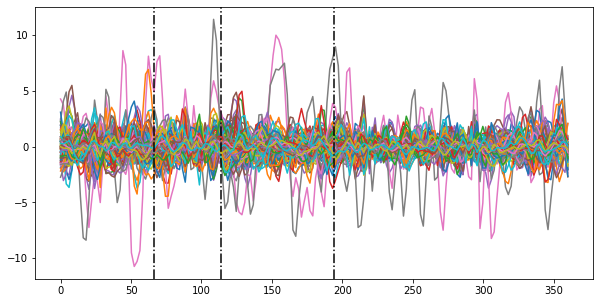

In [11]:
fMRIdet.PlotEcpts(saveFigPath="detectionResults.jpg")

### Plot the reconstructed curve under the optimal kappa

 Similarly, you can specify the `saveFigPath` to save the figure
 
 You should specify the subsets of sequences you want to plot via `idxs` argument

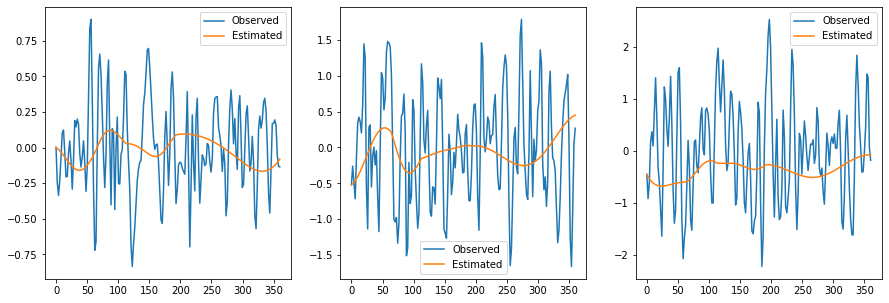

In [12]:
fMRIdet.PlotRecCurve(idxs=[84, 31, 35], saveFigPath="recCurve.jpg")

### Plot the eigenvalue curve under the optimal kappa

 Similarly, you can specify the `saveFigPath` to save the figure

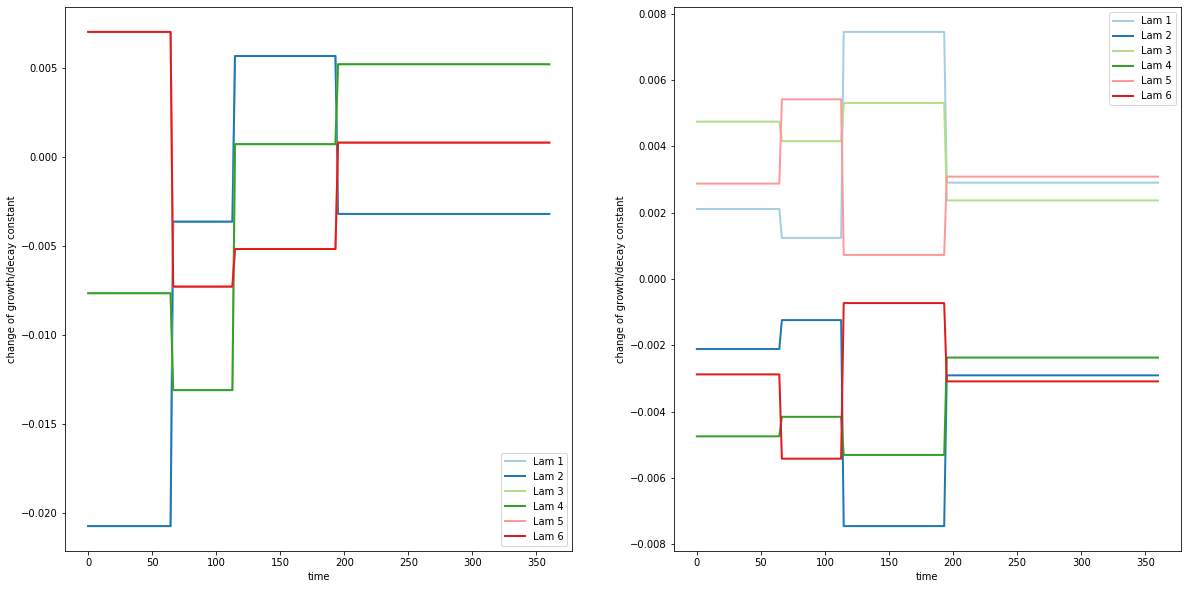

In [13]:
fMRIdet.PlotEigenCurve()